<a href="https://colab.research.google.com/github/tserandon/python/blob/main/Y11_20_21_DeltaV_Forces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La liste n contient les valeurs :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


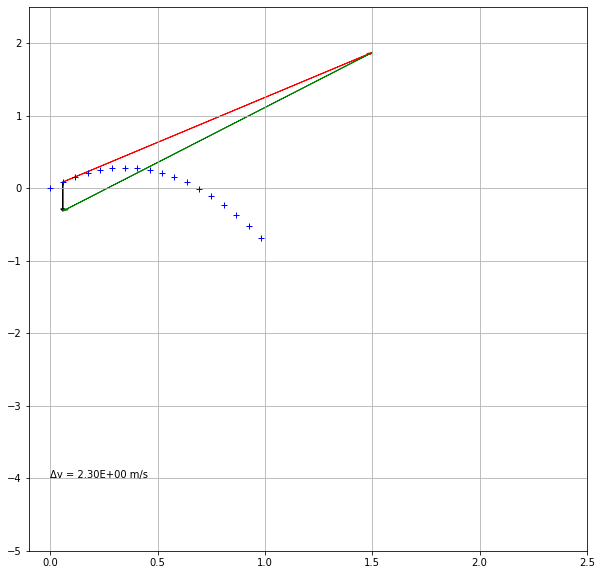

In [ ]:
#Please ignore linge 2 to 4 : loading necessary packages for animation
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.animation as animation


#Importing numpy and matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

#Importing data obtained through video analysis (Tracker)
t=[0,0.04,0.08,0.12,0.16,0.2,0.24,0.28,0.32,0.36,0.4,0.44,0.48,0.52,0.56,0.6,0.64,0.68,0.72]
x=[0.00000000,0.05772000,0.11544000,0.17316000,0.23088000,0.28860000,0.34632000,0.40404000,0.46176000,0.51948000,0.57720000,0.63492000,0.69264000,0.75036000,0.80808000,0.86580000,0.92352000,0.98124000]
y=[0.00000000,0.08756000,0.15912000,0.21468000,0.25424000,0.27780000,0.28536000,0.27692000,0.25248000,0.21204000,0.15560000,0.08316000,-0.00528000,-0.10972000,-0.23016000,-0.36660000,-0.51904000,-0.68748000]

#Creation of a list containing every integer starting at 1 and finishing at 16,
#so 16 values (because t,x and y each have 18 values and we cannot calculate the
#velocity (vecteur vitesse) for the last point and the Delta v for the first and
#last point)
n=np.arange(1,len(t)-2)

#Scale to resize vectors coordinate so we will be able to see them and the point
#at the same time
scale=1

#Define xaxis and yaxis min and max displayed values
xmin = -0.1
xmax = 2.5
ymin = -5
ymax = 2.5

#Verification of the content of the list n
print('La liste n contient les valeurs : ',n)

#Creation of the plot showing the successive positions of the ball during its
#motion
fig = plt.figure(figsize=(10,10))

#Creation of a function that will return the necessary information to create the
#velocity representation for each point (except the last)
#AJOUTER UN POUND SIGN BEFORE fig.clear() to allow superposition of every vector
def vecteurvi(i):
  global t,x,y,n
  fig.clear() 
  plt.plot(x,y,'b+')
  plt.axis([xmin, xmax, ymin, ymax])
  plt.grid()
  #pour chaque point sauf le premier et le dernier, on trace au point de coordonnés
  #(x[i],y[i]) un vecteur dont les coordonnées sont celle du vecteur v_{i}
  #vx = (x[i+1]-x[i])*scale/(t[i+1]-t[i]) et vy = (y[i+1]-y[i])*scale/(t[i+1]-t[i])
  vx_i = (x[i+1]-x[i])/(t[i+1]-t[i])
  vy_i = (y[i+1]-y[i])/(t[i+1]-t[i])
  plt.arrow(x[i],y[i],vx_i,vy_i,head_width=0.02,length_includes_head=True,color='r')
  #pour chaque point sauf le premier et le dernier, on trace au bout du vecteur
  #v_{i} un vecteur dont les coordonnées sont celle du vecteur -v_{i-1}
  vx_imoinsun = (x[i]-x[i-1])/(t[i]-t[i-1])
  vy_imoinsun = (y[i]-y[i-1])/(t[i]-t[i-1])
  #pour chaque point sauf le premier et le dernier, on trace le vecteur variation
  #de vitesse entre les points i et i-1
  plt.arrow(x[i],y[i],vx_i-vx_imoinsun,vy_i-vy_imoinsun,head_width=0.02,length_includes_head=True)
  plt.arrow(x[i]+vx_i,y[i]+vy_i,-vx_imoinsun,-vy_imoinsun,head_width=0.02,length_includes_head=True,color='g')
  #calcul et affichage de la valeur du vecteur variation de vitesse en chaque point
  valeur = np.sqrt((vx_i-vx_imoinsun)**2+(vy_i-vy_imoinsun)**2)
  #crée une version affichable de valeur, appelée val, au format scientifique avec
  #deux chiffres après la virgule et l'affiche sur le graphique aux coordonnées (0,-4)
  val=str("%.2E"%valeur)
  plt.text(0,-4,"Δv = "+val+ " m/s")
  
#Superposition of the graph and the vectors, one by one.
anim = animation.FuncAnimation(fig, vecteurvi, frames=n, blit=False, repeat=True)
anim